<a href="https://colab.research.google.com/github/rajputvivek07/Data-Analysis/blob/main/Vivek_46_DA_EXP7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OEIT6, Data Analytics, 2022** 

# **Lab 7: Time Series Forecasting: Data, Analysis, and Practice** 

---

**Objective: **

> Based on competition available at Kaggle, https://www.kaggle.com/c/house-prices-advanced-regression-
techniques/overview/description,  revolving around predicting the house price through regression 
techniques. your objective is to build a regression model and measure the performance of the  model in 
terms of accuracy, recall, sensitivity, specificity, ROC curves, precision recall curves and loss function 
for regression. 

> Introduction: 
A time series is a chronological sequence of observations on a particular variable. Usually the 
observations are taken at regular intervals (days, months, years), but the sampling could be irregular. A 
time series analysis consists of steps: 

>>> (1) building a model that represents a time series 

>>> (2) validating the model proposed 

>>> (3) using the model to predict (forecast) future values and/or impute missing values. 

> If a time series has a regular pattern, then a value of the series should be a function of previous values. 
The goal of building a time series model is the same as the goal for other types of predictive models 
which is to create a model such that the error between the predicted value of the target variable and the 
actual value is as small as possible. 
The primary difference between time series models and other types of models is that lag values of the 
target variable are used as predictor variables, whereas traditional models use other variables as 
predictors, and the concept of a lag value doesn’t apply because the observations don’t represent a 
chronological sequence. 
From experimental point of view There are two general approaches to modelling time series data that 
contain a trend and/or seasonal variation. 
>> 1. First model the trend and seasonality in the data, and then use a stationary time series model to 
represent the short-term correlation. 
>> 2. Model the trend, seasonality and short-term correlation in the data simultaneously using a non-
stationary time series model. 
 
 
 
> Task: 
This experiment serves as an introduction to exploring and visualizing time series data and covers: 
>> 1. Create time series data. 

>>> • Replication requirements: What you’ll need to reproduce the analysis 

>>> • Creating time series objects: Convert your data to a time series object for time series analysis. 

>> 2. Accommodate trend, as well as seasonal and event-related variation, in time series models. 

>>> • Time series plots: Basic visualization of ts objects and differentiating trends, seasonality, and 
cycle variation. 

>>> • Seasonal plots: Plotting seasonality trends in time series data. 

>> 3. Stationary and Autocorrelation of time series: Computing constant mean and variance and 
visualizing autocorrelation. 
>> 4. White noise: Differentiating signal from the noise. 
(Currently Following steps are not to be done) 
>> 5. Diagnose, fit, and interpret exponential smoothing models, ARMA models   
>> 6. Identify relative strengths and weaknesses of the above model types. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [ ]:
from matplotlib import style
plt.style.use('Solarize_Light2')
plt.style.use('dark_background')

# Dataset exploration

Attribute information:

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the train and test datasets from google drive 
df_train = pd.read_csv("housingPrices_train.csv")
df_test = pd.read_csv("housingPrices_test.csv")

In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00000000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00000000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00000000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00000000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00000000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# dropping 'Id' column as it is same as the index
train = df_train.drop('Id', axis=1)
test = df_test.drop('Id', axis=1)

In [ ]:
# merging train and test datasets for cleaning
# Each data set is assigned a column called "ind" -> indicator
# we will need to use that when doing the train test split
# this is for the kaggle competetion
df = pd.concat([train.assign(ind="train"), test.assign(ind="test")])

In [ ]:
# Display the sample of the dataframe
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
0,60,RL,65.00000000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.00000000,train
1,20,RL,80.00000000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.00000000,train
2,60,RL,68.00000000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.00000000,train
3,70,RL,60.00000000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.00000000,train
4,60,RL,84.00000000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.00000000,train


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [ ]:
# stats of the numerical variable columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.00000000,57.13771840,42.51762783,20.00000000,20.00000000,50.00000000,70.00000000,190.00000000
LotFrontage,2433.00000000,69.30579531,23.34490471,21.00000000,59.00000000,68.00000000,80.00000000,313.00000000
LotArea,2919.00000000,10168.11408016,7886.99635911,1300.00000000,7478.00000000,9453.00000000,11570.00000000,215245.00000000
OverallQual,2919.00000000,6.08907160,1.40994721,1.00000000,5.00000000,6.00000000,7.00000000,10.00000000
OverallCond,2919.00000000,5.56457691,1.11313075,1.00000000,5.00000000,5.00000000,6.00000000,9.00000000
YearBuilt,2919.00000000,1971.31277835,30.29144153,1872.00000000,1953.50000000,1973.00000000,2001.00000000,2010.00000000
YearRemodAdd,2919.00000000,1984.26447413,20.89434423,1950.00000000,1965.00000000,1993.00000000,2004.00000000,2010.00000000
MasVnrArea,2896.00000000,102.20131215,179.33425304,0.00000000,0.00000000,0.00000000,164.00000000,1600.00000000
BsmtFinSF1,2918.00000000,441.42323509,455.61082587,0.00000000,0.00000000,368.50000000,733.00000000,5644.00000000
BsmtFinSF2,2918.00000000,49.58224812,169.20561110,0.00000000,0.00000000,0.00000000,0.00000000,1526.00000000


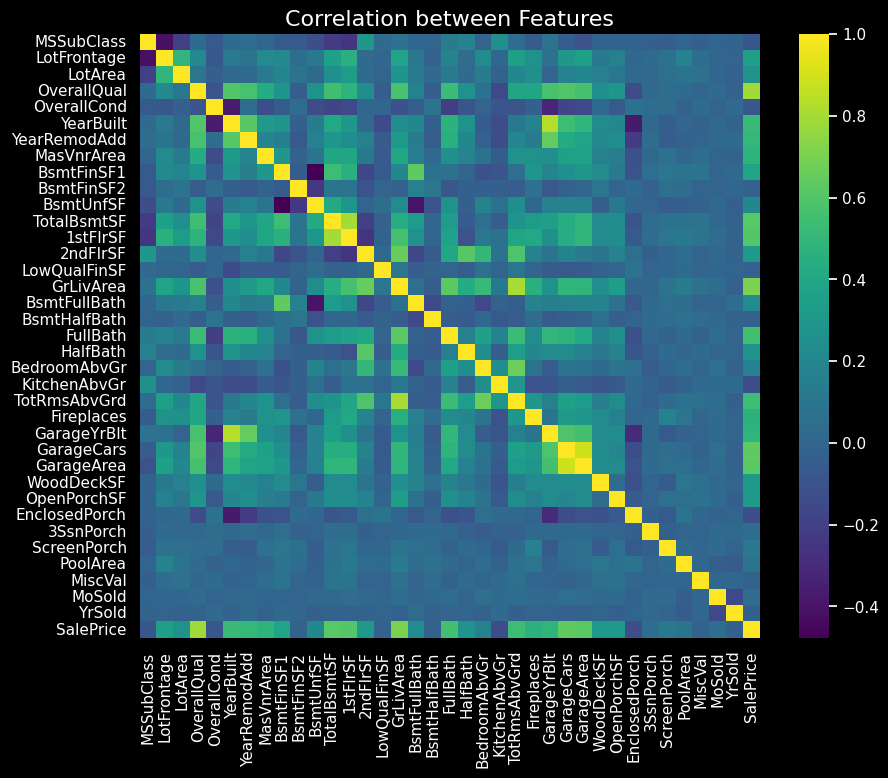

In [ ]:
# Heat map visualization to figure out the correlations
plt.figure(figsize=(10,8), dpi=100)
sns.heatmap(df.corr(), cmap='viridis')
plt.title("Correlation between Features");

Now, let us focus on figuring out the correlation of the target variable SalePrice and the other variables

In [ ]:
# Correlation between SalePrice and other attributes
SalePrice_corr = df.corr()['SalePrice'].sort_values()[:-1]
print(f'Correlation of SalePrice with Features: \n\n{SalePrice_corr}')

Correlation of SalePrice with Features: 

KitchenAbvGr    -0.13590737
EnclosedPorch   -0.12857796
MSSubClass      -0.08428414
OverallCond     -0.07785589
YrSold          -0.02892259
LowQualFinSF    -0.02560613
MiscVal         -0.02118958
BsmtHalfBath    -0.01684415
BsmtFinSF2      -0.01137812
3SsnPorch        0.04458367
MoSold           0.04643225
PoolArea         0.09240355
ScreenPorch      0.11144657
BedroomAbvGr     0.16821315
BsmtUnfSF        0.21447911
BsmtFullBath     0.22712223
LotArea          0.26384335
HalfBath         0.28410768
OpenPorchSF      0.31585623
2ndFlrSF         0.31933380
WoodDeckSF       0.32441344
LotFrontage      0.35179910
BsmtFinSF1       0.38641981
Fireplaces       0.46692884
MasVnrArea       0.47749305
GarageYrBlt      0.48636168
YearRemodAdd     0.50710097
YearBuilt        0.52289733
TotRmsAbvGrd     0.53372316
FullBath         0.56066376
1stFlrSF         0.60585218
TotalBsmtSF      0.61358055
GarageArea       0.62343144
GarageCars       0.64040920
GrLivA

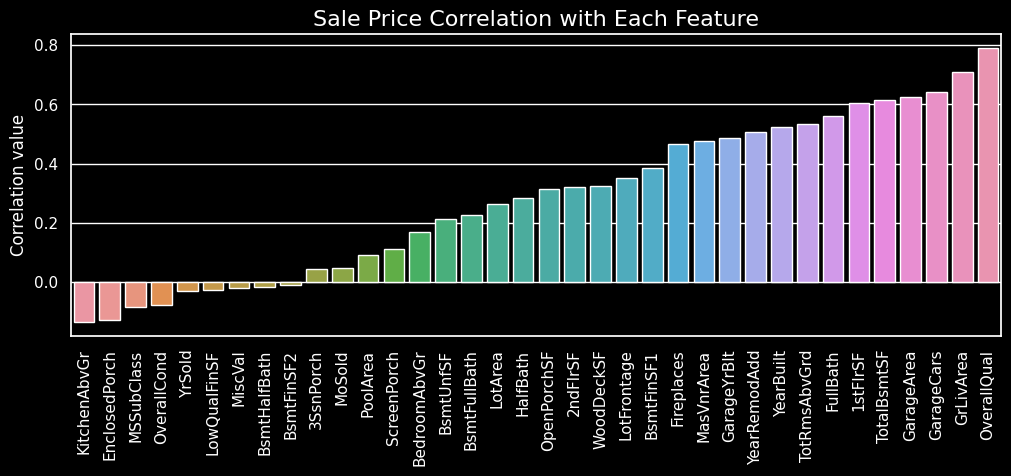

In [ ]:
# To graphically viasualize the extent of the correlation of the target variable with the other variables
# let us plot them in a sorted manner
fig, ax = plt.subplots(figsize=(12, 4), dpi=100)
ax = sns.barplot(x=SalePrice_corr.index, y=SalePrice_corr.values)
plt.title("Sale Price Correlation with Each Feature")
plt.ylabel("Correlation value")
plt.xticks(rotation=90);

From the above plot we can see that variables such as the OverallQual, GrLivArea, GarageCars and GarageAreas are extremenly importnat wrt the sales price of the house

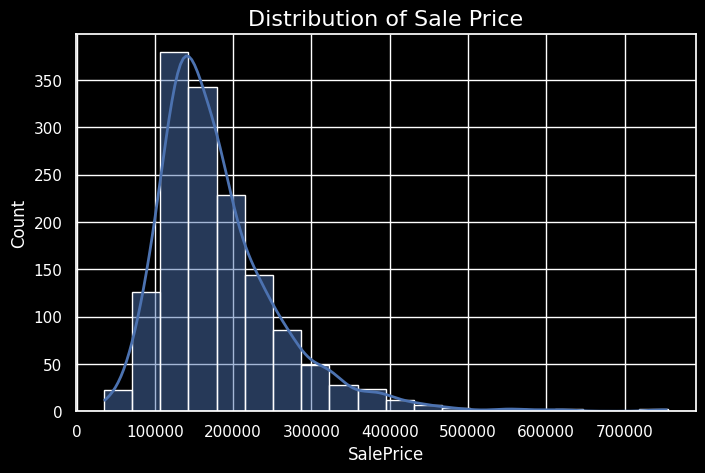

In [ ]:
# let us see the distribution of the sales prices of the houses
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
ax = sns.histplot(df['SalePrice'], bins=20, kde=True)
plt.title("Distribution of Sale Price");

# Dealing with Outliers

To improve the peroformance of our model, let us visualize the most important parameters, so that we can get an idea about the outliers

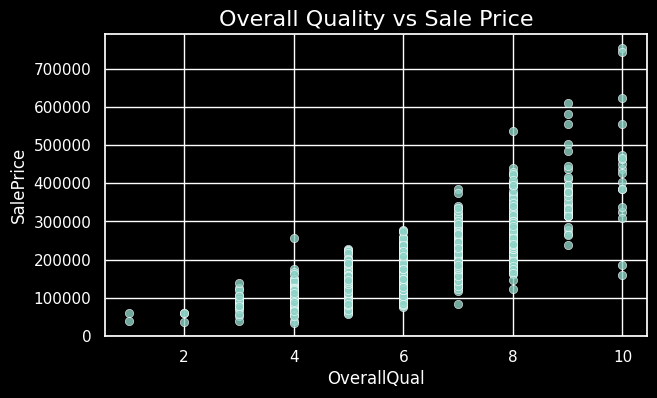

In [ ]:
# Overall Quality vs Sale Price
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
ax = sns.scatterplot(data=df, y='SalePrice', x='OverallQual', alpha=0.8)
plt.title("Overall Quality vs Sale Price");

We see that a few of the houses who's overall quality is above 8 still are sold at a lower price. These are the ouliert to the general trend of incresing houses prices wrt increasing overall lquanlity

In [ ]:
# The outliers:
df[(df['OverallQual'] > 8) & (df['SalePrice'] < 200000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
523,60,RL,130.00000000,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,NaN,NaN,NaN,0,10,2007,New,Partial,184750.00000000,train
1298,60,RL,313.00000000,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000.00000000,train


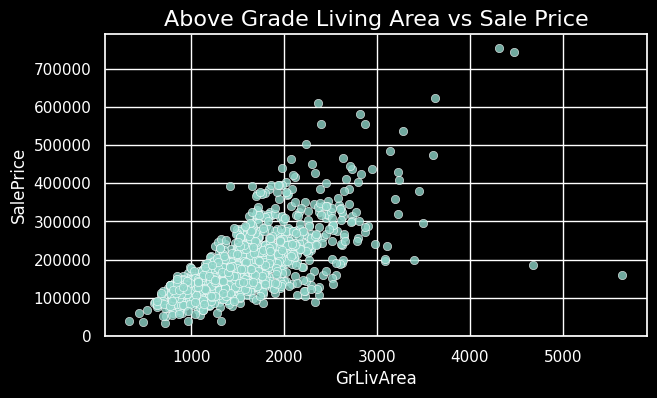

In [ ]:
# Grade Living Area vs Sale Price
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
ax = sns.scatterplot(data=df, y='SalePrice', x='GrLivArea', alpha=0.8)
plt.title("Above Grade Living Area vs Sale Price");

The sale price goes up with an increase in living area and an increase in overall quality, but there are some outliers to this trend

the outlliers being: few houses are available at a price less than $300000 for Ground Living Area of above 4000 sq. feet.

In [ ]:
df[((df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
523,60,RL,130.00000000,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,NaN,NaN,NaN,0,10,2007,New,Partial,184750.00000000,train
1298,60,RL,313.00000000,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000.00000000,train


The index 523 and index 1298 of the train data set are the common outliers based on above visualizations. These can be removed as they lie far from the rest of the observations.

In [ ]:
# removing these instances
df = df[~((df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000))]

print("The new shape of the dataframe is : ", df.shape)

The new shape of the dataframe is :  (2917, 81)


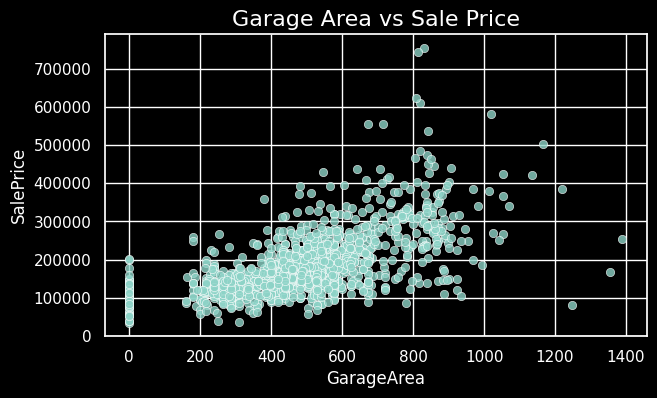

In [ ]:
# Garage Area vs Sale Price
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
ax = sns.scatterplot(data=df, y='SalePrice', x='GarageArea', alpha=0.8)
plt.title("Garage Area vs Sale Price");

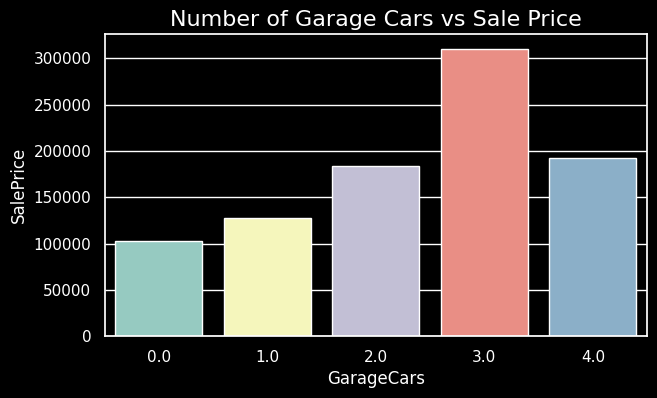

In [ ]:
# Garage Cars vs Sale Price
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
ax = sns.barplot(data=df, y='SalePrice', x='GarageCars', ci=0)
plt.title("Number of Garage Cars vs Sale Price")
plt.xlim(-0.5, 4.5);

# Dealing with Null values and NaN values in the dataset

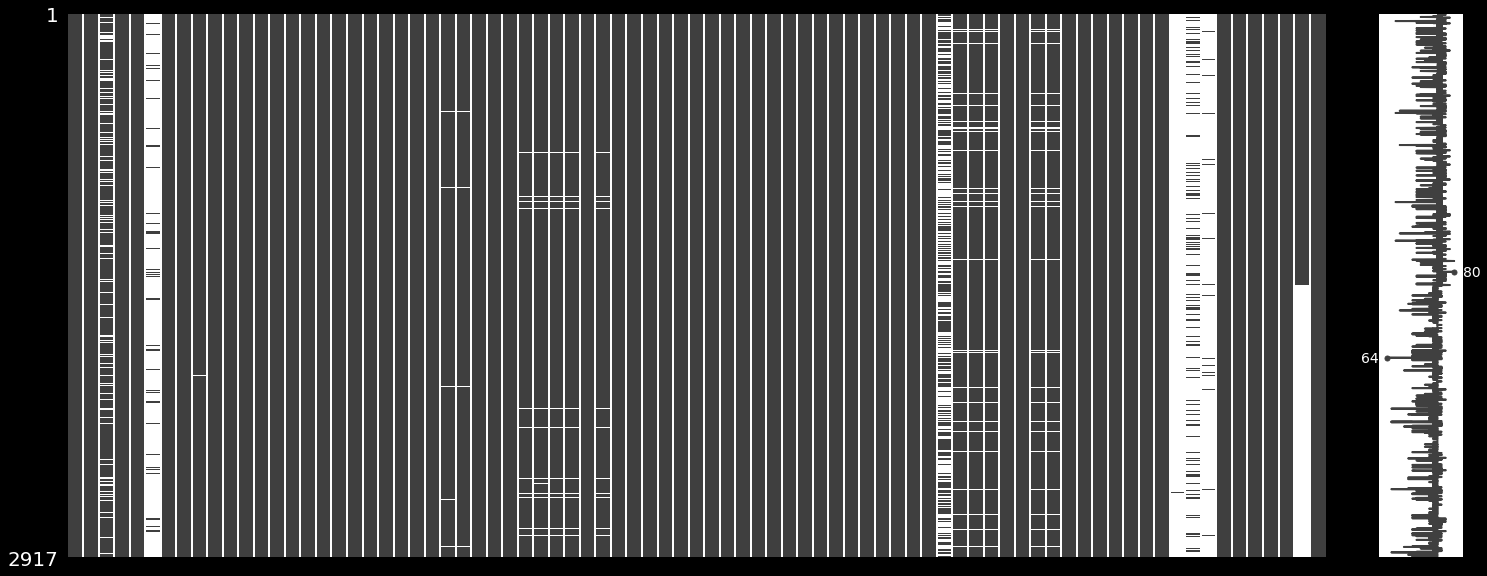

In [ ]:
#visualizing the missing data
import missingno as msno
msno.matrix(df)

In [ ]:
# null values for each column
df.isnull().sum().sort_values()

MSSubClass        0
Heating           0
HeatingQC         0
1stFlrSF          0
2ndFlrSF          0
               ... 
SalePrice      1459
Fence          2346
Alley          2719
MiscFeature    2812
PoolQC         2908
Length: 81, dtype: int64

In [ ]:
# the NaN values of the salesPrice is simply the test dataset
df_test.shape

(1459, 80)

In [ ]:
# Function for calculating the missing values in percentage 
def null_perc(df):
    df = df.drop('SalePrice', axis=1)
    null_data_perc = 100 * df.isna().mean()
    null_data_perc = null_data_perc[null_data_perc > 0].sort_values()
    
    return null_data_perc

# Function for counting the missing values for each column 
def null_count(df):
    df = df.drop('SalePrice', axis=1)
    null_data_count = df.isnull().sum()
    null_data_count = null_data_count[null_data_count > 0].sort_values()
    return null_data_count

# Display the percentage of NaN for each feature
print('Percentage of missing values for each column in ascending order:\n')
print(null_perc(df))

Percentage of missing values for each column in ascending order:

TotalBsmtSF     0.03428180
GarageArea      0.03428180
GarageCars      0.03428180
KitchenQual     0.03428180
Electrical      0.03428180
BsmtUnfSF       0.03428180
BsmtFinSF2      0.03428180
BsmtFinSF1      0.03428180
SaleType        0.03428180
Exterior1st     0.03428180
Exterior2nd     0.03428180
Functional      0.06856359
Utilities       0.06856359
BsmtHalfBath    0.06856359
BsmtFullBath    0.06856359
MSZoning        0.13712719
MasVnrArea      0.78848132
MasVnrType      0.82276311
BsmtFinType1    2.70826191
BsmtFinType2    2.74254371
BsmtQual        2.77682551
BsmtCond        2.81110730
BsmtExposure    2.81110730
GarageType      5.38224203
GarageCond      5.45080562
GarageQual      5.45080562
GarageYrBlt     5.45080562
GarageFinish    5.45080562
LotFrontage    16.66095303
FireplaceQu    48.68015084
Fence          80.42509427
Alley          93.21220432
MiscFeature    96.40041138
PoolQC         99.69146383
dtype: float64


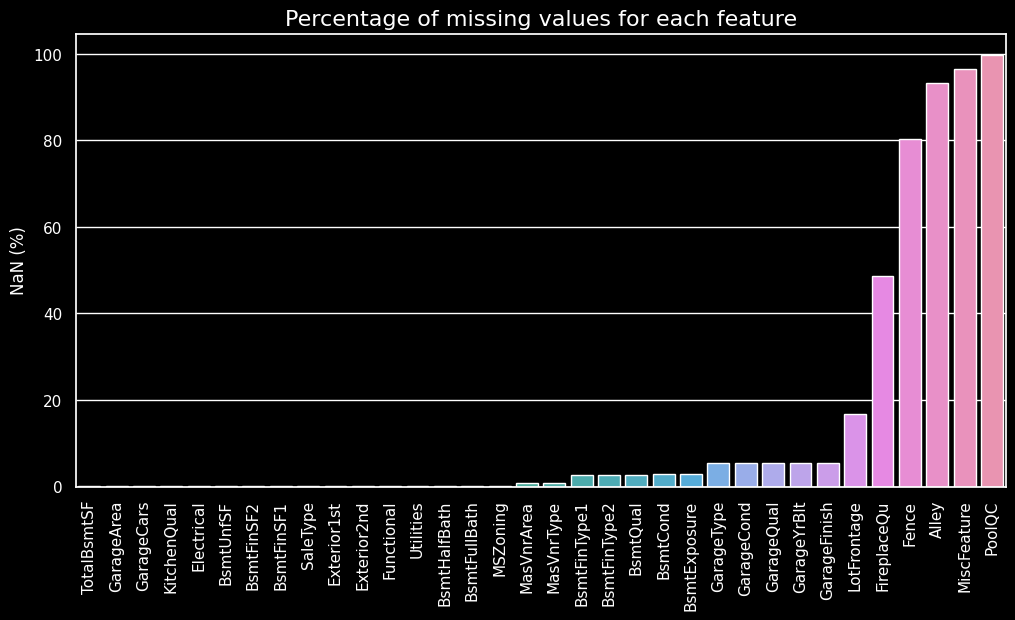

In [ ]:
# Visualizng the percentage of missing values for each feature
plt.figure(figsize=(12,6), dpi=100)
sns.barplot(x=null_perc(df).index, y=null_perc(df).values)
plt.title('Percentage of missing values for each feature')
plt.ylabel('NaN (%)')
plt.xticks(rotation=90);

now filling up or deleting the missing values

In [ ]:
# MasVnrType is null
df[df['MasVnrType'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
234,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,5,2010,WD,Normal,216500.00000000,train
529,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624.00000000,train
650,60,FV,65.00000000,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,5,2008,WD,Normal,205950.00000000,train
936,20,RL,67.00000000,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2009,WD,Normal,184900.00000000,train
973,20,FV,95.00000000,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,12,2008,New,Partial,182000.00000000,train
977,120,FV,35.00000000,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,11,2007,New,Partial,199900.00000000,train
1243,20,RL,107.00000000,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2006,New,Partial,465000.00000000,train
1278,60,RL,75.00000000,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,3,2008,WD,Normal,237000.00000000,train
231,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,7,2009,WD,Normal,NaN,test
246,20,FV,90.00000000,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,10,2009,New,Partial,NaN,test


In [ ]:
# Filling missing datapoints in MasVnrType and MasVnrArea with 'NA' and 0.0
df['MasVnrType'] = df['MasVnrType'].fillna('NA')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0.0)

In [ ]:
#filling up the electrial null vals with the value of the highers freq/mode of the data
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

print(f'Updated - Missing values count for each feature: \n\n{null_count(df)}')

Updated - Missing values count for each feature: 

SaleType           1
GarageArea         1
GarageCars         1
Exterior1st        1
Exterior2nd        1
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
BsmtFinSF2         1
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
MSZoning           4
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtCond          82
BsmtExposure      82
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
LotFrontage      486
FireplaceQu     1420
Fence           2346
Alley           2719
MiscFeature     2812
PoolQC          2908
dtype: int64


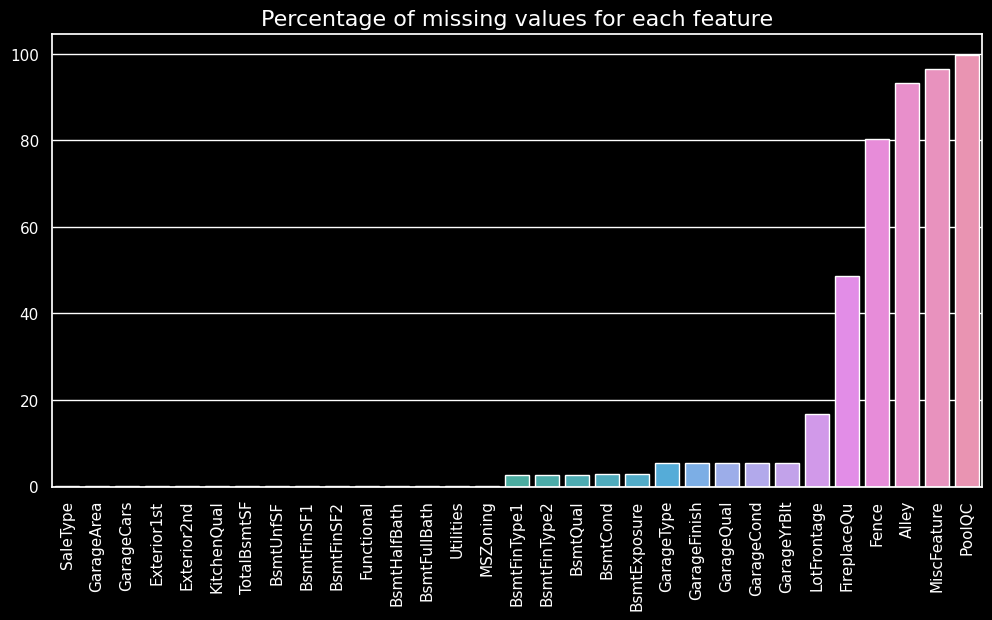

In [ ]:
# updated missing values
plt.figure(figsize=(12,6), dpi=100)
sns.barplot(x=null_perc(df).index, y=null_perc(df).values)
plt.title('Percentage of missing values for each feature')
plt.xticks(rotation=90);

General strategy used -> replce with the highest frequency variable

In [ ]:
basement_nan_str_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df[basement_nan_str_cols] = df[basement_nan_str_cols].fillna('NA')

garage_nan_str_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[garage_nan_str_cols] = df[garage_nan_str_cols].fillna('NA')

we assume that the garage was built on the same year as the house

In [ ]:
# The 'GarageYrBlt' missing data filled with YearRemodAdd
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearRemodAdd'])

In [ ]:
df[df['GarageArea'].isnull() == True]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
1116,70,RM,50.00000000,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,NaN,test


For houses that do not have a garage, both the garage varaibes can be set to zero

In [ ]:
df[['GarageArea', 'GarageCars']] = df[['GarageArea', 'GarageCars']].fillna(0.0)

Basemenet varables if null can be replaces with NA
 

In [ ]:
basement_nan_num_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']

df[basement_nan_num_cols] = df[basement_nan_num_cols].fillna(0.0)

df[df['BsmtFullBath'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
660,20,RM,99.00000000,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN,test
728,20,RL,123.00000000,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,7,2008,WD,Normal,NaN,test


In [ ]:
df[['BsmtFullBath', 'BsmtHalfBath']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtFullBath  2915 non-null   float64
 1   BsmtHalfBath  2915 non-null   float64
dtypes: float64(2)
memory usage: 132.9 KB


In [ ]:
# Since the houses 660 and 728 have no basement, the BsmtFullBath and BsmtHalfBath can be filled with 0
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0.0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0.0)

In [ ]:
# exploring the fireplace variables 
print("Number of houses that do not have a fireplace : ", df[df['Fireplaces'] == 0].shape[0])
print("---"*20)
print(f'Updated number of missing column values :\n\n{null_count(df)}')

Number of houses that do not have a fireplace :  1420
------------------------------------------------------------
Updated number of missing column values :

Exterior1st       1
Exterior2nd       1
KitchenQual       1
SaleType          1
Utilities         2
Functional        2
MSZoning          4
LotFrontage     486
FireplaceQu    1420
Fence          2346
Alley          2719
MiscFeature    2812
PoolQC         2908
dtype: int64


Missing fireplaces filled with NA

In [ ]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')

for the folling attributes there is no option of 'NA'. Hence these columns with NaN can be filled with the most occuring class.

In [ ]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

print(f'Updated number of missing column values :\n\n{null_count(df)}')

Updated number of missing column values :

Utilities         2
Functional        2
MSZoning          4
LotFrontage     486
Fence          2346
Alley          2719
MiscFeature    2812
PoolQC         2908
dtype: int64


### Feature: Pool

In [ ]:
df[df['PoolArea'] == 0].shape

(2905, 81)

In [ ]:
df[df['PoolArea'] != 0][['PoolArea', 'PoolQC', 'ind']]

,PoolArea,PoolQC,ind
197,512,Ex,train
810,648,Fa,train
1170,576,Gd,train
1182,555,Ex,train
1386,519,Fa,train
1423,738,Gd,train
514,144,Ex,test
960,368,NaN,test
1043,444,NaN,test
1113,228,Ex,test


most occuring category of the PoolQC is used to fill the void.

In [ ]:
df[(df['PoolArea'] == 0) & (df['PoolQC'].isnull())].shape

(2905, 81)

In [ ]:
poolqc_freq = df['PoolQC'].mode()[0]

mask = (df['PoolArea'] != 0) & (df['PoolQC'].isnull())

df.loc[mask, 'PoolQC'] = df.loc[mask, 'PoolQC'].fillna(poolqc_freq)

houses with zero pool areas-> NaN values can be replaced with 'NA'. 

In [ ]:
df['PoolQC'] = df['PoolQC'].fillna('NA')

print(f'Updated number of missing column values :\n\n{null_count(df)}')

Updated number of missing column values :

Utilities         2
Functional        2
MSZoning          4
LotFrontage     486
Fence          2346
Alley          2719
MiscFeature    2812
dtype: int64


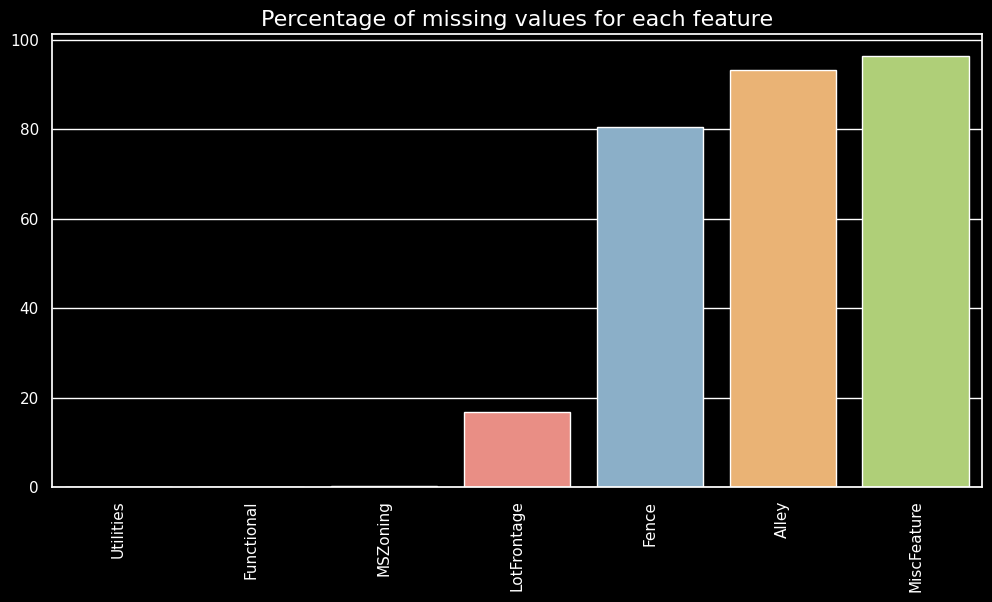

In [ ]:
# Plotting the updated result of missing values in percentage for remaining features
plt.figure(figsize=(12,6), dpi=100)
sns.barplot(x=null_perc(df).index, y=null_perc(df).values)
plt.title('Percentage of missing values for each feature')
plt.xticks(rotation=90);

filling up the rest of the columns with mode or with NA wherever a feature of a house is optional

In [ ]:
# Miscellaneous feature not covered in other categories
df['MiscFeature'] = df['MiscFeature'].fillna('NA')

# Fence quality
df['Fence'] = df['Fence'].fillna('NA')

# Type of alley access to property
df['Alley'] = df['Alley'].fillna('NA')

# Type of utilities available
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])

# Home functionality
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])

# Identifies the general zoning classification of the sale
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

# Now the only column with null values is LotFrontage
print(f'Remaining number of missing column values :\n\n{null_count(df)}')

Remaining number of missing column values :

LotFrontage    486
dtype: int64


last remaining -> lot frontage

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
0,60,RL,65.00000000,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,NA,NA,NA,0,2,2008,WD,Normal,208500.00000000,train
1,20,RL,80.00000000,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,NA,NA,NA,0,5,2007,WD,Normal,181500.00000000,train
2,60,RL,68.00000000,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,NA,NA,NA,0,9,2008,WD,Normal,223500.00000000,train
3,70,RL,60.00000000,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,NA,NA,NA,0,2,2006,WD,Abnorml,140000.00000000,train
4,60,RL,84.00000000,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,NA,NA,NA,0,12,2008,WD,Normal,250000.00000000,train


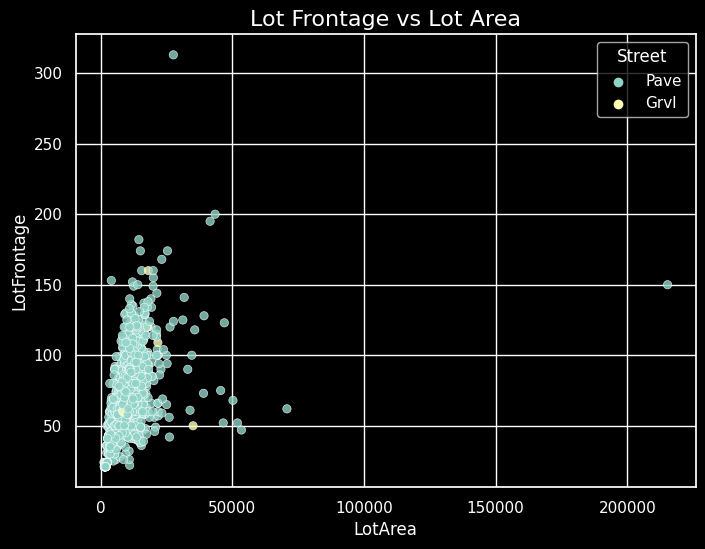

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
sns.scatterplot(data=df, x='LotArea', y='LotFrontage', hue='Street', alpha=0.8)
plt.title('Lot Frontage vs Lot Area');

as lot frontage is a continous variable, we will replace with with the mean value

In [ ]:
df["LotFrontage"] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

print(f'Remaining number of missing column values :\n{null_count(df)}')

Remaining number of missing column values :
Series([], dtype: int64)


In [ ]:
#REMOVE ME
# The df dataframe is split based on the "ind" column.
test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]

# Drop the 'ind' column as it is not needed
# it's purpose is done
test = test.drop('ind', axis=1)
train = train.drop('ind', axis=1)

# Splitting train data set into Features and Label
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']

# dorpping since these values will for sure be NaN
X_test = test.drop('SalePrice', axis=1)

In [ ]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [ ]:
train["Date"] = train['YrSold'].astype(str) +"-"+ train["MoSold"].astype(str)

In [ ]:
train["Date"] = pd.to_datetime(train["Date"], format='%Y-%m-%d')

In [ ]:
result_df = train.sort_values(by = ['Date','MoSold'])

In [ ]:
result_df = pd.DataFrame(result_df, columns=['Date', 'SalePrice'])

In [ ]:
result_df

,Date,SalePrice
141,2006-01-01,260000.00000000
169,2006-01-01,228000.00000000
302,2006-01-01,205000.00000000
370,2006-01-01,172400.00000000
411,2006-01-01,145000.00000000
...,...,...
419,2010-07-01,142000.00000000
705,2010-07-01,55000.00000000
1144,2010-07-01,80000.00000000
1160,2010-07-01,146000.00000000


In [ ]:
import matplotlib.pyplot as plt   
import seaborn as sns             
import numpy as np

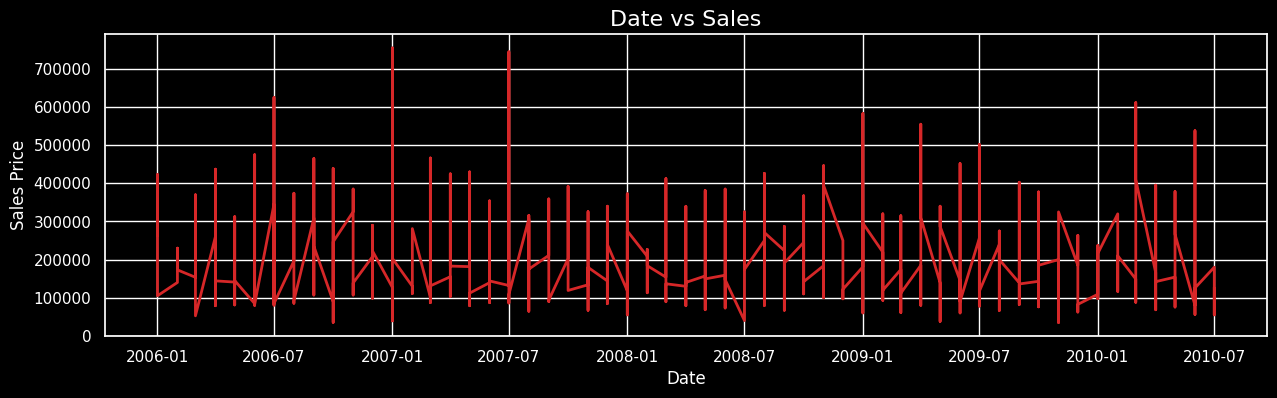

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Sales Price', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(result_df, x=result_df['Date'], y=result_df['SalePrice'], title='Date vs Sales')

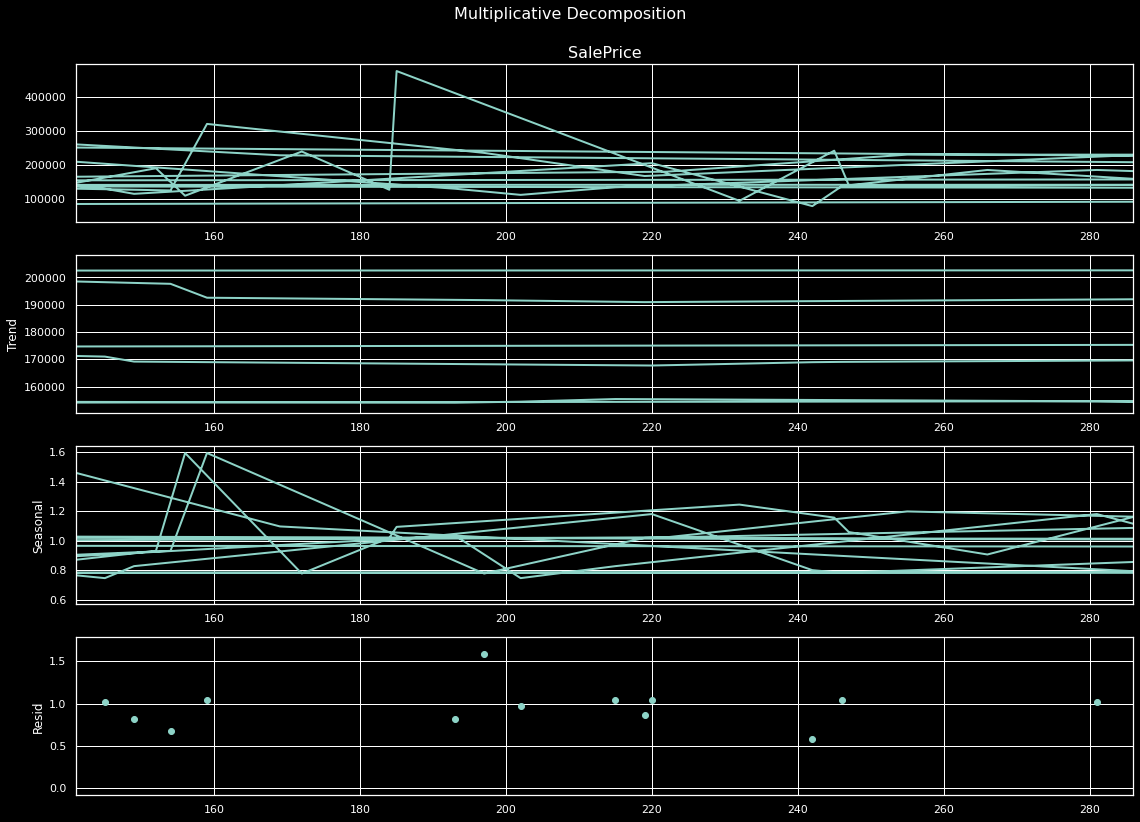

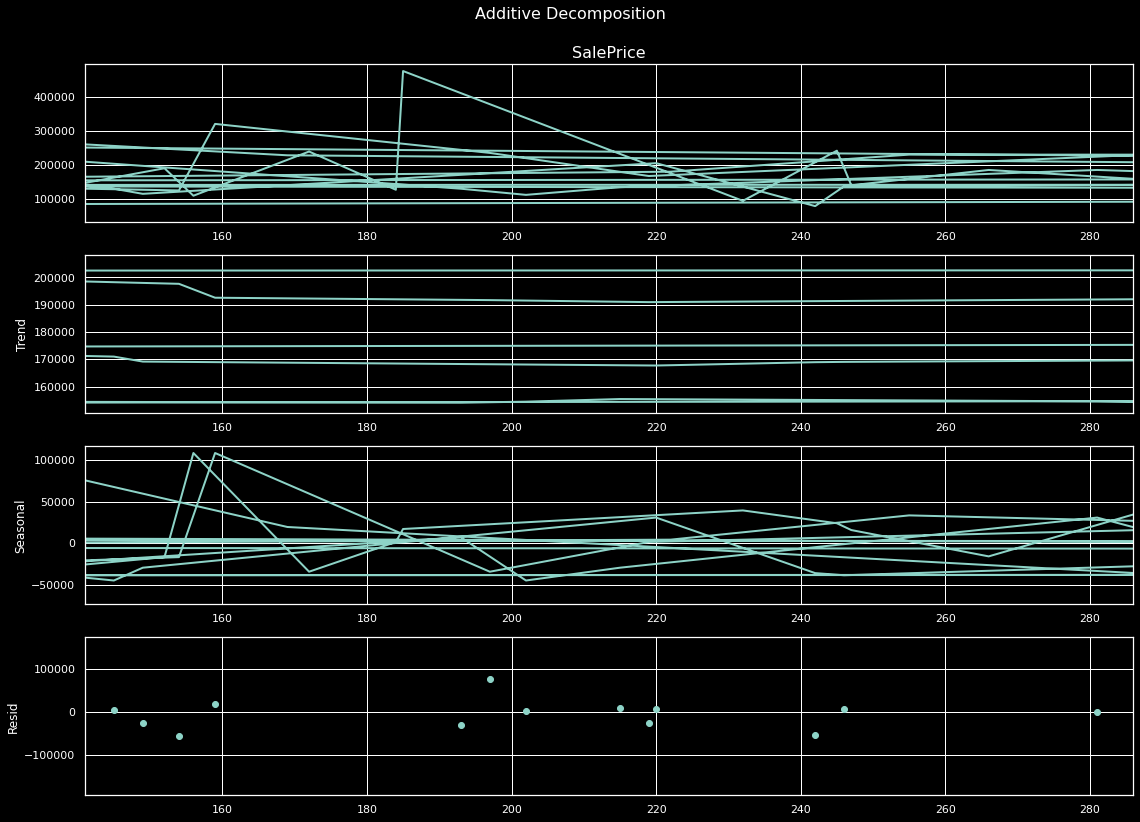

In [ ]:


from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

new_df=result_df.iloc[0:120,:]

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(new_df['SalePrice'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(new_df['SalePrice'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()
     


The above snippet shows the seasonality, trend and the plot of the timeseries data. The plot does not show a regular trend or seasonality.

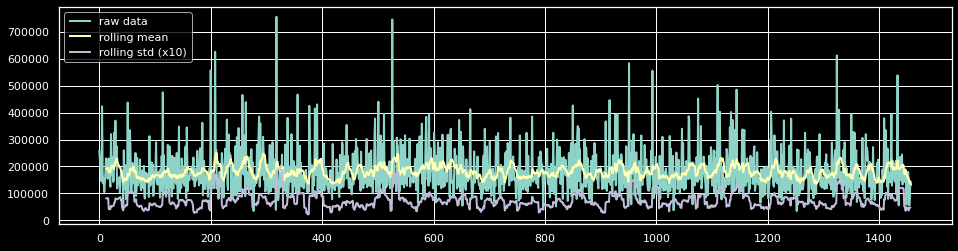

In [ ]:
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(series,'raw data')
    



p<0.05 ->stationary

p>0.05 ->Non-stationary


In [ ]:
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -38.535402831591014
n_lags: 0.0
p-value: 0.0
Critial Values:
   1%, -3.434846127900848
Critial Values:
   5%, -2.8635257411342616
Critial Values:
   10%, -2.5678271914441395


Value of p<0.05 which proves the data is stationary.

<ipython-input-464-addde1f0341b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['SalePriceDiff1'] = diff(new_df['SalePrice'],k_diff=1)
<ipython-input-464-addde1f0341b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['SalePriceDiff2'] = diff(new_df['SalePrice'],k_diff=2)
<ipython-input-464-addde1f0341b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

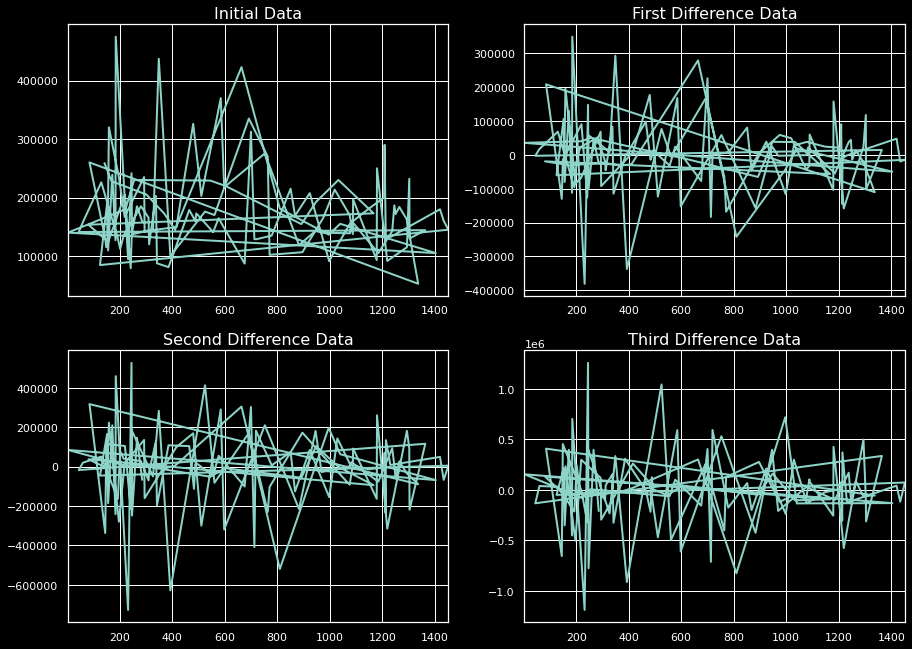

In [ ]:
from statsmodels.tsa.statespace.tools import diff
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15, 11))

new_df['SalePriceDiff1'] = diff(new_df['SalePrice'],k_diff=1)
new_df['SalePriceDiff2'] = diff(new_df['SalePrice'],k_diff=2)
new_df['SalePriceDiff3'] = diff(new_df['SalePrice'],k_diff=3)

new_df['SalePrice'].plot(title="Initial Data",ax=ax[0][0]).autoscale(axis='x',tight=True);
new_df['SalePriceDiff1'].plot(title="First Difference Data",ax=ax[0][1]).autoscale(axis='x',tight=True);
new_df['SalePriceDiff2'].plot(title="Second Difference Data",ax=ax[1][0]).autoscale(axis='x',tight=True);
new_df['SalePriceDiff3'].plot(title="Third Difference Data",ax=ax[1][1]).autoscale(axis='x',tight=True);

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


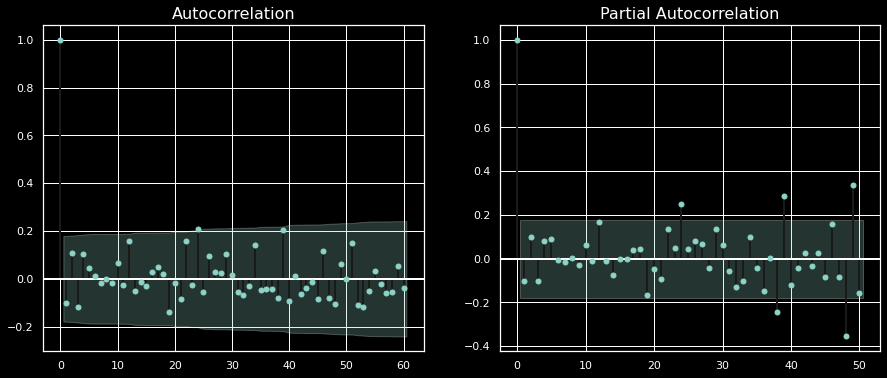

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,acf
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
autocorr = acf(new_df['SalePrice'], nlags=60) # just the numbers
plot_acf(new_df['SalePrice'].tolist(), lags=60, ax=ax[0]); # just the plot
plot_pacf(new_df['SalePrice'].tolist(), lags=50, ax=ax[1]); # just the plot

#Train test split & Model training

In [ ]:
# The df dataframe is split based on the "ind" column.
test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]

# Drop the 'ind' column as it is not needed
# it's purpose is done
test = test.drop('ind', axis=1)
train = train.drop('ind', axis=1)

# Splitting train data set into Features and Label
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']

# dorpping since these values will for sure be NaN
X_test = test.drop('SalePrice', axis=1)

#using one hot encoding
X_train_enc = pd.get_dummies(X_train, drop_first=True)

X_test_enc = pd.get_dummies(X_test, drop_first=True)

print(f'Encoded X_train columns: {X_train_enc.shape[1]}')
print()
print(f'Encoded X_test columns: {X_test_enc.shape[1]}')

Encoded X_train columns: 259

Encoded X_test columns: 242


modifying the X_test and X_train in order to make sure that they have the same shape. Filling the empty cells with zero

In [ ]:
enc_train_cols = X_train_enc.columns.tolist()

X_test_enc = X_test_enc.reindex(columns=enc_train_cols).fillna(0)

print(f'Encoded X_train columns: {X_train_enc.shape[1]}')
print()
print(f'Encoded X_test columns: {X_test_enc.shape[1]}')

Encoded X_train columns: 259

Encoded X_test columns: 259


# Prediction of House Prices

**Model Used:** RFRegression

In [ ]:
from sklearn.model_selection import train_test_split

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_train_enc, y_train, test_size = 0.2)

In [ ]:
X_test_n.shape

(292, 259)

In [ ]:
y_test_n.shape

(292,)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def median_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def print_metrics(prediction, val_y):
    val_mae = mean_absolute_error(val_y, prediction)
    median_AE = median_absolute_error(val_y, prediction)
    r2 = r2_score(val_y, prediction)

    print('')
    print('R\u00b2: {:.2}'.format(r2))
    print('')
    print('Average Absoloute Error: {:.3} %'.format(mean_absolute_percentage_error(val_y, prediction)))
    print('Median Absolute Error: {:.3} %'.format(median_absolute_percentage_error(val_y, prediction)))

In [ ]:
model = RandomForestRegressor(n_estimators=2000, 
                              n_jobs=-1,  
                              bootstrap=False,
                              criterion='mse',
                              max_features=3,
                              random_state=1,
                              max_depth=55,
                              min_samples_split=5
                              )

model.fit(X_train_n, y_train_n)

predictions = model.predict(X_test_n).round(0)
print_metrics(predictions, y_test_n)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(



R²: 0.86

Average Absoloute Error: 10.8 %
Median Absolute Error: 6.79 %


In [ ]:
predictions.shape

(292,)

The house price prediction task involved the following: data visualization, handling of outliers, replacing the null values for feature columns, converting categorical data into binary values and finally training the model with RFRegressor

# Inferences
The time series data don't indicate a clear value trend.

In the instance of an ADF stochastic, the p value is less than 0.05, demonstrating that it is non stationary.

The auto correlation graphic initially displays high correlation.

The autocorrelation plot initially shows a high value, suggesting that the signal repeats for a brief period, but thereafter displays a low value, showing that there is no repetition.

we also learnt how to use the various regression algorithms that are a part of the sklearn package

we implemented the RFRegressor for the model, as well as exprimented with simple linear models too

we also saw as to how we can calculate the R^2 score and the mean and the median absoulute error